In [19]:

import matplotlib.gridspec as gspec
import matplotlib.patches as mp
import matplotlib.pyplot as plt
import numpy as np

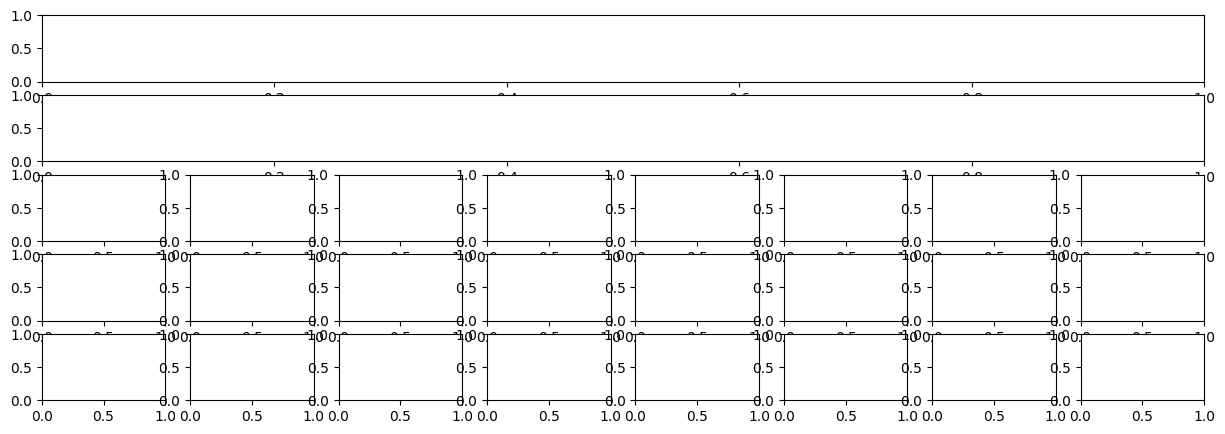

In [126]:
def generate_grid(n_rows: int, n_cols: int, n_rows_per_col: int = 3, figsize: tuple[int, int] = None) -> tuple[plt.Figure, tuple[list[plt.Axes], list[plt.Axes]]]:
    if figsize is None:
        figsize = (n_rows + n_rows_per_col - 1, n_cols)

    fig = plt.figure(figsize = figsize)
    gs = gspec.GridSpec(n_rows + n_rows_per_col - 1, n_cols)

    row_axes = list()
    for i in range(n_rows - 1):
        row_axes.append(fig.add_subplot(gs[i, :]))

    col_axes = list()
    for i in range(n_cols):
        col_ax = list()
        for j in range(n_rows_per_col):
            col_ax.append(fig.add_subplot(gs[n_rows + j - 1, i]))
        col_axes.append(col_ax)

    return fig, row_axes, col_axes

fig, v_axes, h_axes = generate_grid(3, 8, 3, figsize=(15, 5))

In [30]:
from deepmeg.utils.params import read_pkl, LFCNNParameters
import os
path = '/data/pt_02648/spatual/RESULTS/sbj03/240823_2groups_training_s_vs_c_lfcnn/'
params = LFCNNParameters.load(os.path.join(path, 'params.pkl'))

/data/pt_02648/NeuralGeometry/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
import mne, copy


def plot_patterns(
    patterns, info, order=None, axes=None, cmap='RdBu_r', sensors=True,
    colorbar=False, res=64,
    size=1, cbar_fmt='%3.1f', name_format='Latent\nSource %01d',
    show=True, show_names=False,
    outlines='head', contours=6,
    image_interp='linear'
) -> plt.Figure:
    if order is None:
        order = range(patterns.shape[1])

    info = copy.deepcopy(info)
    info.__setstate__(dict(_unlocked=True))
    info['sfreq'] = 1.
    patterns = mne.EvokedArray(patterns, info, tmin=0)
    return patterns.plot_topomap(
        times=order,
        axes=axes,
        cmap=cmap, colorbar=colorbar, res=res,
        cbar_fmt=cbar_fmt, sensors=sensors, units=None, time_unit='s',
        time_format=name_format, size=size, show_names=show_names,
        outlines=outlines,
        contours=contours, image_interp=image_interp, show=show)

In [41]:
info = params.info
A = params.spatial.patterns

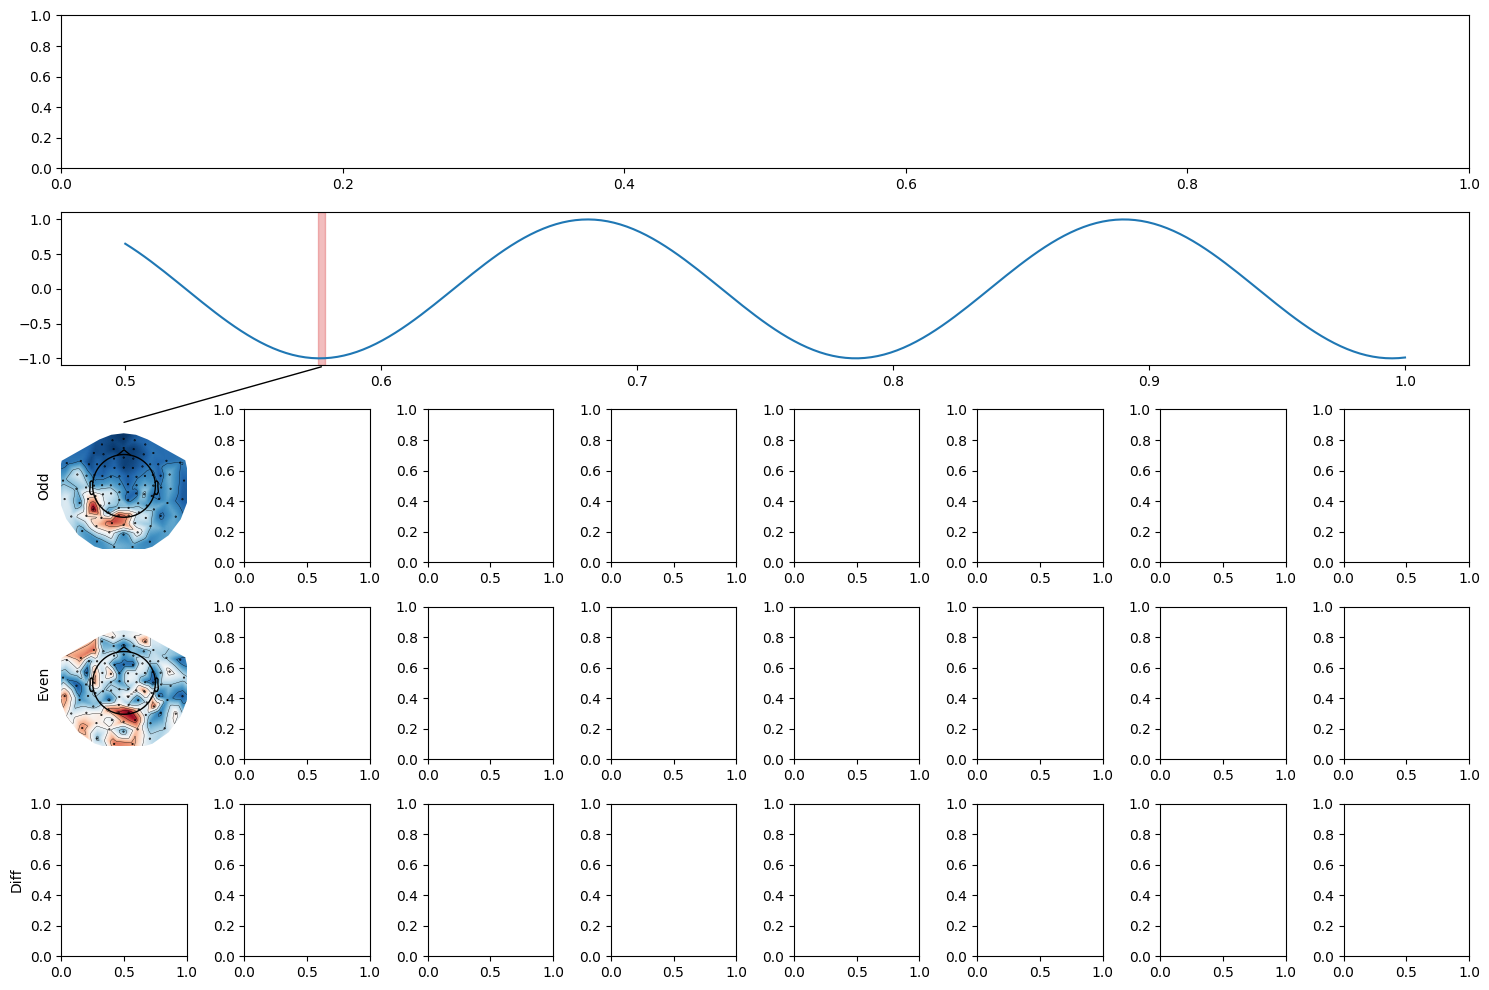

In [137]:
times = np.linspace(0.5, 1, 200)

fig, v_axes, h_axes = generate_grid(3, 8, figsize=(15, 10))
data = np.sin(30*times)
v_axes[1].plot(times, data)

c1, c2 = 30, 31

v_axes[1].axvspan(times[c1], times[c2], color='tab:red', alpha=0.3)
x_low, x_high = v_axes[1].get_xlim()
middle_time = (times[c1] + times[c2])/2
time_perc = (middle_time - x_low)/(x_high - x_low)

plot_patterns(A, order=0, info=info, axes=h_axes[0][0], show=False, name_format='')
h_axes[0][0].set_ylabel('Odd')
plot_patterns(params.spatial.filters, order=0, info=info, axes=h_axes[0][1], show=False, name_format='')
h_axes[0][1].set_ylabel('Even')
h_axes[0][2].set_ylabel('Diff')

times_scaled = (times - times.min()) / (times.max() - times.min())

con = mp.ConnectionPatch(
    [time_perc, -0.01],
    [.5, 1],
    'axes fraction',
    'axes fraction',
    axesA=v_axes[1], axesB=h_axes[0][0]
)
fig.add_artist(con)
fig.tight_layout()

In [56]:
v_axes[1].get_ylim()[0]

(-1.0999856403632562, 1.0998848053782044)